
# **Protein sequence Alignment of TEM-1 with 100 homologs**:
NCBI Blast protein alignment is used to align TEM-1 beta lactamase with 100 proteins.
For the blast search RefSeq library was selected. 

Results:
The alignemnt comprises 95 class A beta lactamases and 5 serine hydrolases. The Identity which reports on the percantage of matching amino acids between the aligned sequece and TEM-1 ranges from 47.5% - 99.65%.

# **Alignment Analysis** 
1. Alignment Heatmap & Consensus Sequence
2. Calculation of conservation score   
    2.1 Pei & Grishin conservation  
    2.2 Shannon entropy  
    2.3 Comparision of Pei & Grishin and Shannon conservation  
    - Barplot
    - Correlation scatter plot 
3. Residue categorization by DMS and Conservation
    - Correlation scatter plots
    - Categorization in bar plots 
    
4. Concensus Sequence Alignment  
    4.1 Self calculated concensus (SCC)  
    4.2 Emboss Concensus Sequence (ECS)  
    - Blosum62, PAM250
    - Blosum90
    - PAM460
    4.3 Optimization of BLOSUM90 alignment
    
5. Extended : DMS trend at important positions

6. Extended: Hypothesis testing 

        

       


# 1.Alignment Heatmap & Concensus Sequence

In [48]:
import numpy as np, Bio, matplotlib.pyplot as plot
from matplotlib.ticker import FormatStrFormatter
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import wilcoxon

%matplotlib inline

#Creating the parameters for the heatmap

font = {'family': 'monospace',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

palette = [
    '#C8C8C8', '#145AFF', '#00DCDC', '#E60A0A', '#E6E600',
    '#00DCDC', '#E60A0A', '#EBEBEB', '#8282D2', '#0F820F', 
    '#0F820F', '#145AFF', '#E6E600', '#3232AA', '#DC9682', 
    '#FA9600', '#FA9600', '#B45AB4', '#3232AA', '#0F820F', 
    '#FFFFFF']


aa = 'ARNDCQEGHILKMFPSTWYV-'

# This is the fasta file with the 100 aligned sequences
fasta_file = "dataSources/MSA_datasets/TEM-1_Alignment_100_Homolgs.aln"
sequences = SeqIO.to_dict(SeqIO.parse(fasta_file, "fasta"))

#Converting fasta to list with 286 Positions
msa = list(SeqIO.parse(fasta_file,'fasta'))
L = len(msa[0].seq)#286 Positions
N = len(msa)#101 rows

#Creating empty data frame for the counted amino acids at each position
freq = np.zeros([L,21])

#creating the concensus sequence
concensus = np.zeros(L)

In [49]:
#Counts the amino acids for each position and selects the amino acid with the highest frequency for the concensus sequnece

for i in range(0,N):
    for j in range(0,L):
        j_aa = aa.find(msa[i].seq[j])
        freq[j,j_aa] = freq[j,j_aa] + 1 
for i in range(0, L):
    concensus[i] = freq[i].argmax()



In [50]:
#Heatmap
conservation = np.sqrt(np.sum((np.square(freq/N - 0.05)),axis=1))
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))

for j in seq_display:
    posit = -float(np.where(seq_display == j)[0][0]) * spacing_scale - spacing
    axes.text(-5,posit, "Seq "+(str(j+1)))
    for i in range(0, L):
        axes.text(float(i),posit, msa[j].seq[i],
            bbox=dict(facecolor=palette[aa.find(msa[j].seq[i])], alpha=0.5),fontdict=font)
        
figure

#sometimes this chunk produces an error randomly. In this case we had to restart pycharm for it to run correctly


TypeError: 'dict' object is not callable

In [ ]:
#shows the concensus sequence at the bottom
posit = posit - spacing
axes.text(-5,posit, "Concensus")
for i in range(0, L):
    axes.text(float(i),posit, 'ARNDCQEGHILKMFPSTWYV-'[int(concensus[i])] ,
                bbox=dict(facecolor=palette[int(concensus[i])], 
                alpha=0.5),fontdict=font)
    
figure

# 2. Calculatuion of Conservation score & modeling of concensus sequence

## 2.1 Pei & Grishin conservation
Measures the root mean square deviation between the amino acid distribution p~ia and the average amino acid distribution over the whole alignment, which is 1/20 as a range of 20 amino acids can mutate into each position. 

     V = √∑(p_ia/N-E)^2
     max: V = 0 (each a 5x times in alignemnt)
     min: V = 0.95 (total conserved position)







In [ ]:
conservation = np.sqrt(np.sum((np.square(freq/N - 0.05)),axis=1))
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))#

figure

# 2.2 Shannon entropy 
The entropy H for each position with amino acid frequency p_ia is:

    H = - ∑p_ialog2(p_ia)
    min: H = 0 (all 100 positions equal)
    max: H = 4.321 (each amino acid occurs 5 times in alignment)

- the negative sum of the logarithmus base two multiplied by the proportion of amino acid a is calculated for each amino acid a = 1-20 





In [ ]:
#positions without occurence of one amino acid have values of -inf (value=0, log=-inf )
# convert them to nan
with pd.option_context('mode.use_inf_as_na',True):
    log_nmb = freq/N* np.log2(freq/N)
    log_nmb[ log_nmb == -np.inf] = np.nan 

#ignore nan and calculate the entropy for each position
conservation_Shannon = np.nansum(log_nmb, axis=1,)*-1


figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation_Shannon, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))

figure

# 2.3 Comparision of Pei & Grishin and Shannon conservation
Differences of the conservation scores: 

- Pei & Grishin conservation increases with conservation score whereas conservation decreases with increasing Shannon entropy  

- Shannon entropy measures the amount of disorder for each position which is quite sensitive for rare amino acids occurences

- Pei & Grishin conservation is less senistive because the difference between frequencies instead of their ratio is used to measure the variance

In [ ]:
figure = plt.figure(figsize=(20, 6))
axes1 = plt.subplot(211)
axes2 = plt.subplot(212)

width = 0.35 
x = np.arange(L) 

axes1.bar(x, conservation_Shannon, width, align='center', linewidth=0, color='red', label='Conservation Shannon')
axes1.set_ylabel('Conservation')

axes2.bar(x, conservation, width, align='center', linewidth=0, color='blue', label='Pei & Grishin')
axes2.set_ylabel('Conservation')

spacing_scale = axes1.get_ylim()[1] / 6
spacing = spacing_scale * 2

axes1.legend()
axes2.legend()

plt.tight_layout()
plt.show()

For better comparability, the conservation scores are z-normalizated.  
The scores should be directling opposing to each other after z-normalisation, as the same trend has the opposite sign.

### Export DMS_Conservation.csv

In [ ]:
# Cut signal sequence 0-23 
conservation_core_V = conservation[23:]
conservation_Shannon_cut = conservation_Shannon[23:]

#data frame with mean z-normalized position scores
df_mean = pd.read_pickle('dataSources/handovers/position_means.pkl')
df_DMS_Conserv = df_mean[['mean_Stiffler_z', 'mean_Deng_z', 'mean_Firnberg_z', 'mean_all_z']].copy()

#adding conservation scores 
df_DMS_Conserv['Pei&Grishin'] = conservation_core_V
df_DMS_Conserv_S = df_DMS_Conserv.copy()
df_DMS_Conserv_S['Conserved_Shannon'] = conservation_Shannon_cut

print(df_DMS_Conserv_S)


In [ ]:
#z-normalisation of Shannon conservation und Pei Grishin conservation
df_DMS_Conserv_S_Norm = df_DMS_Conserv_S.copy()

def z_score(column):
    mean = column.mean()
    std = column.std()
    z_scores = (column - mean) / std
    return z_scores


df_DMS_Conserv_S_Norm['Conserved_Shannon'] = z_score(df_DMS_Conserv_S['Conserved_Shannon'])
df_DMS_Conserv_S_Norm['Pei&Grishin'] = z_score(df_DMS_Conserv_S['Pei&Grishin'])

#Dataframe export
df_DMS_Conserv_S_Norm.to_csv('dataSources/handovers/DMS_Conservation.csv', index=False)



In [ ]:
# P&G and Shannon conservation z-normalized
DMS_Conservation  = pd.read_csv('dataSources/handovers/DMS_Conservation.csv')

x = np.arange(24.0, 287.0, 1.0)
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x, DMS_Conservation['Conserved_Shannon'], width, label='Shannon')
rects2 = ax.bar(x, DMS_Conservation['Pei&Grishin'], width, label='Pei & Grishin')

ax.set_xlabel('Position')
ax.set_ylabel('Conservation Score')
ax.set_title('Comparision of Conservation Scores')
ax.legend()
plt.tight_layout()
plt.show()

Opposite bars mean the same trend and are predominantly represented, also the conservation strength (lenght of bars) seems to be quite equal. 

In [ ]:
#Calculation of correlation score 
corr = np.corrcoef(DMS_Conservation['Conserved_Shannon'], DMS_Conservation['Pei&Grishin'])
print(corr)

plt.scatter(DMS_Conservation['Conserved_Shannon'], DMS_Conservation['Pei&Grishin'])
plt.xlabel('Shannon')
plt.ylabel('Pei & Grishin')
plt.title('Correlation of Shannon Entropy and Pei & Grishin Conservation')
plt.show()

## Results:
     r = 0.99118175
There is significant correlation between the conservation values of both calculation methods.  
For further approach we deicided to use the Shannon Entropy as it is more sensitive.  


# 3.Residue categorization by DMS and conservation

In the following analysis we are going to verify the following hypothesis: 

I. High fragility (low DMS) conditions higher conservation    
II. Conservation occurs only when necessary, thus at fragile residues    
III. Thus, high robustness (high DMS) conditions lower conservation     

 

In [ ]:

C_df_New = DMS_Conservation.copy()
C_df_New['Position'] = range(24,287)

x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

rects1 = ax1.bar(x, C_df_New['Conserved_Shannon'], width, label='Shanon Conservation')
rects2 = ax1.bar(x, C_df_New['mean_all_z'], width, bottom=C_df_New['Conserved_Shannon'], label='mean DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Mean DMS with Shannon Conservation')
ax1.legend()

rects3 = ax2.bar(x, C_df_New['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, C_df_New['mean_Stiffler_z'], width, bottom=C_df_New['Conserved_Shannon'], label='mean Stiffler')

ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Mean Stiffler with Shannon Conservation')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
C_df_New = DMS_Conservation.copy()
C_df_New['Position'] = range(24,287)

fig, axs = plt.subplots(2, 4, figsize=(50, 20))

for i, col in enumerate(C_df_New.columns):
    if col == 'Position' or col == 'Pei&Grishin' or col =='Conserved_Shannon':
        continue
    else:
        axs[0,i-1].scatter(C_df_New[col], C_df_New['Pei&Grishin'])
        axs[1,i-1].scatter(C_df_New[col], C_df_New['Conserved_Shannon'])
        axs[0, i-1].set_xlabel(col)  
        axs[0, i-1].set_ylabel('Conservation score')  
        
        axs[1, i-1].set_xlabel(col)  
        axs[1, i-1].set_ylabel('Conservation score')  


plt.xlabel('DMS')
plt.ylabel('Conservation score')
plt.tight_layout()
plt.show()

In [ ]:
cor_df = pd.DataFrame(columns=['Shannon', 'Pei&Grishin'])

for col in C_df_New.columns:
    if col == 'Position':
        continue
    else:
        cor_v = C_df_New[col].corr(C_df_New['Pei&Grishin'])
        cor_S = C_df_New[col].corr(C_df_New['Conserved_Shannon'])
        cor_df = pd.concat([cor_df, pd.DataFrame({'Pei&Grishin': [cor_v], 'Shannon': [cor_S]}, index=[col])])

cor_df = cor_df.rename(index={'Stiffler': 0, 'Deng': 1, 'Firnberg': 2, 'Mean': 3, 'variance': 4, 'Shannon': 5})
display(cor_df)


## Results:

### Scatter plots: 
The scatter plots of Pei and Grsihin (upper row) and Shannon (lower row) with each DMS data set are almost exactly identical but opposed, as the same trend has opposite signs in the conservation formulars.  
Across the DMS data sets ther scatter plots show a consistent picture.  
Two clusters can be detected, located in the corners of high conservation and low DMS scores and low conservation and high DMS scores.  
Both hypothesis can be maintained by these results.

### Correlation scores:
There are only minor differences in the correlation between Shannon and P&G with the datasets.
The absolute correlation values are in range of r = 0.53 - 0.71  
The correlation of  Deng DMS scores is the lowest with r = 0.53, while the correlation of Firnberg, Stiffler and the merged model are similar and range from r= 0.66 - 0.72.

In [ ]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax1s = plt.subplots()

# Position of interest
ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       width, color='blue', label='Position of interest')

ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       width,
       color='green', label='Unnecessary Conserved')

ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'], 0),
       width, color='red', label='Random Position')

ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'],0 ),
       color='red', alpha=0.5)

ax1s.set_xlabel('Position')
ax1s.set_ylabel('Scores')
ax1s.set_title('Shannon Entropy of Stiffler mean DMS')
ax1s.legend()

plt.tight_layout()
plt.show()


In [ ]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax2m = plt.subplots()

# Position of interest
ax2m.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       width, color='blue', label='Position of interest')

ax2m.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax2m.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       width,
       color='green', label='Unnecessary Conserved')

ax2m.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax2m.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax2m.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax2m.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'], 0),
       width, color='red', label='Random Position')

ax2m.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'],0 ),
       color='red', alpha=0.5)

ax2m.set_xlabel('Position')
ax2m.set_ylabel('Scores')
ax2m.set_title('Shannon Entropy of merged model')
ax2m.legend()

plt.tight_layout()
plt.show()

In [ ]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax3f = plt.subplots()

# Position of interest
ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Firnberg_z'], 0),
       width, color='blue', label='Position of interest')

ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Firnberg_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Firnberg_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Firnberg_z'], 0),
       width,
       color='green', label='Unnecessary Conserved')

ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Firnberg_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Firnberg_z'], 0),
       width, color='red', label='Random Position')

ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Firnberg_z'],0 ),
       color='red', alpha=0.5)

ax3f.set_xlabel('Position')
ax3f.set_ylabel('Scores')
ax3f.set_title('Shannon Entropy of Firnberg mean DMS')
ax3f.legend()

plt.tight_layout()
plt.show()

In [ ]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax4d = plt.subplots()

# Position of interest
ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Deng_z'], 0),
       width, color='blue', label='Position of interest')

ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Deng_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Deng_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Deng_z'], 0),
       width,
       color='green', label='Unneccessary Conserved')

ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Deng_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Deng_z'], 0),
       width, color='red', label='Random Position')

ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Deng_z'],0 ),
       color='red', alpha=0.5)

ax4d.set_xlabel('Position')
ax4d.set_ylabel('Scores')
ax4d.set_title('Shannon Entropy of Deng mean DMS')
ax4d.legend()

plt.tight_layout()
plt.show()


## Results:
The following positions can be identified in the bar plots:

1. Position of Interest (blue)
    - DMS negative = Fragile 
    - Conservation = Negative
2. Unnecessary conserved Position (green)
    - DMS positive = Robust
    - Conservation = Negative
3. Random Positions
    - DMS positive = Robust
    - Conservation = Positive
4. Destructive Position
    - DMS negative = Fragile
    - Conservation = Positive

The conservation trends of the four DMS mean data sets are overall consitent, with only recognizable differences in the Deng conservation distribution.  
In all four data sets positions of interest and random positions are predominant, which support the hypothesesis that fragile positions are conserved.
Unnecessary conserved positions are rarely found, except in the deng distribution, in which a cluster of this category appears around position 230. Still the proportion of unneccessarry conserved positions is small across the data sets.That supports that conservation only occurs when necessary.
Destructive positions contradict the evolutionary principle of fragile resdiues beeing conserved and do appear rarely in all data sets.




# 4. Concensus Sequence Alignment 
The concensus sequence is commonly composed by the most frequent amino acids in a given alignment. Therefore evolutionary conservation can be estimated by the concensus sequence which is analysed in the following. 
The goal is to find correlation between conservation given by the concensus sequence and the DMS scores.

The following trends are expected: 

1. Mismatches should only occure at random positions with high DMS and low conservation
2. Fragile positions with high conservation (positions of interest), destructive positions and unneccessary conserved positions should not be among the mismatches
3. Random positions should predominate

### Alignment score
The alignment score is a sum of match, mismatch, gap creation, and gap extension scores
     S= Σ of costs (identities, replacements) - Σ of penalties (number of gaps x gap penalties)
Alignment score is calculated by the following parameters:
(parameters are taken from biopython)
- match score = 1
- mismatch score = -2
- gap score = -2,5 
- opening gap score = -1

Opening gap score:
- The first amino acid or nucleotide inserted/deleted (gap open) found during the alignment  is more significant, than the subsequent ones (gap extension)  https://seqan.readthedocs.io/en/main/zreferences.html#id24.
- Appropriate gap scores have been selected over the years by trial and error  
 (Pearson, W.R. , 1995)

## 4.1 Self Calculated Concensus Sequence Alignment (SCC):
- concensus sequence of the most frequent amino acids in the alignemnt at each position
- identification of mismatch positions
- categorisation of mismatch-type in a bar plot 


In [ ]:
#Translation of the concensus sequence in letter code 
aa = 'ARNDCQEGHILKMFPSTWYV-'
concensusseq = []
for z,i in enumerate(concensus):
    letter = aa[int(i)]
    # print(letter)    
    concensusseq.append(letter)

print(concensusseq)


In [ ]:
#Alignemnet of concensus sequence 

from Bio import Align
from Bio import pairwise2
aligner = Align.PairwiseAligner()

#score 
Concensus_Calc = ''.join(concensusseq)
score = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, 0.0, 0.0, 0.0)
print(score[0].score)
print(identical[0].score)
#score = pairwise2.align.globalms(Concensus_Calc,msa[0].seq, score_only=True, match_score=1.0, mismatch_score=-1.0, gap_score = -1.5)
seq_Conc_Calc = Bio.pairwise2.format_alignment(Concensus_Calc,msa[0].seq, score[0].score, 23,286, full_sequences= False ) 

print(seq_Conc_Calc)


In [ ]:
Concensus_Calc = ''.join(concensusseq)
alignments = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
PG_alignment = alignments[0]

# Get mismatch positions
mismatch_positions_SCC = []
for i, (c1, c2) in enumerate(zip(PG_alignment.seqA, PG_alignment.seqB)):
    if i > 23 and c1 != c2:
        mismatch_positions_SCC.append(i+1)

# Output mismatch positions
print("Mismatch positions with index > 23:")
print(mismatch_positions_SCC)


In [ ]:
filtered_df_SCC = C_df_New[C_df_New['Position'].isin(mismatch_positions_SCC)]

x = np.arange(len(filtered_df_SCC))
width = 0.35

fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(1, 4, figsize=(50, 20))

rects1 = ax1.bar(x, filtered_df_SCC['Conserved_Shannon'], width, label='Shannon Conservation')
rects2 = ax1.bar(x, filtered_df_SCC['mean_all_z'], width, label='merged DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Shannon Entropy & Merged')
ax1.legend()

rects3 = ax2.bar(x, filtered_df_SCC['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, filtered_df_SCC['mean_Stiffler_z'], width, label='mean Stiffler')

ax1.set_xticklabels(mismatch_positions_SCC)

ax2.set_xticklabels(mismatch_positions_SCC)
ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Shannon Entropy & Stiffler')
ax2.legend()

rects5 = ax3.bar(x, filtered_df_SCC['Conserved_Shannon'], width, label='Shannon Conservation')
rects6 = ax3.bar(x, filtered_df_SCC['mean_Firnberg_z'], width, label='mean Firnberg')
ax3.set_xlabel('Position')
ax3.set_ylabel('Scores')
ax3.set_title(' Shannon Entropy & Firnberg')
ax3.legend()

rects7 = ax4.bar(x, filtered_df_SCC['Conserved_Shannon'], width, label='Shannon Conservation')
rects8 = ax4.bar(x, filtered_df_SCC['mean_Deng_z'], width, label='mean Deng')
ax4.set_xlabel('Position')
ax4.set_ylabel('Scores')
ax4.set_title(' Shannon Entropy & Deng')
ax4.legend()

plt.tight_layout()
plt.show()


## Results:
The DMS mean and conservation distribution of the mismatch position is quite similar in all DMS data sets. Predominantly present are "Random Positions" (DMS and conservation is positive which indicates robustness and variance). Which is consistent with our expectation, as these regions can accumulate mutations without impact.
Positions of interest should be conserved and do not occur except in the deng distribution, while destructive positions and unnecessary conserved positions occur only marginally.  
That is a good result which supports the hypothesis that conservation correlates with DMS.

Mismatches = 34
  - Random Positions: 13-17  
  - Destructive positions: 2  
 - Positions of interest: 1
 - Unneccessary conserved position: 2
 - Unclear Positions: 12


Problems: 
 - no gradual differentiation of the varaince in amino acids distribution, only the most frequent one is taken 
                
Further approach: 
 - calculation of conscensus sequence with alignment matrix from Emboss

## 4.2 Emboss Concensus Sequence Alignment (ECS)

EMBOSS cons is a program which creates a consensus sequence by weights and scoring matrix values for a multiple sequence alignment. Therefore, every amino acids type at one residue is given a are score, composed of the weight (defined by the alignment file), multiplied with a scoring matrix value and the residue length. The highest scored amino acid is then found and must be greater than the “plurality value” which is defined by the user to set a “cut- off” of matches in the alignment. The highest scored amino acid above the “cut- off ” is inserted in the consensus sequence. If no amino acid reaches the “plurality value” a gap is inserted (emboss.open-bio.org).

PAM point accepted substitution matrix:
This substitution matrix is based on point mutation data from 71 phylogenetic tress with 1572 mutations in total (Jia K, 2021). The difference between the PAM matrices lays in the length of evolutional distance between the aligned proteins. The score of the PAM matrix indicates the distance of the sequences, while increasing scores indicate greater distance. (Mount DW, 2008)

BLOSUM block substitution matrices
BLOSUM matrices are the most common matrices used in MSA. They are not extrapolated by phylogenetic trees like PAM but constructed by alignment data of local alignments. The BLOSUM62 matrix serves as default matrix at NCBI as it describes alignments with wide ranging identities the best (Jia K, 2021).  The higher the number of the BLOSUM matrix the closer is the relation of the aligned sequences and therefore the higher is the identity (Pearson WR, 2013). The identity of TEM-1 alignment reaches from 47.5% to 100% with a huge proportion of around 90%. Therefore BLOSUM62,  BLOSUM90 are used. For reference values consensus sequences of PAM250 (which should be similar to BLOSUM62) and PAM460 are aligned with TEM-1.


The following matrixes where used for concensus calculation: 
- Blosum62 
- PAM250 for verification of Blosum62 results
- Blosum90 
- PAM460 for reference of bad alignment score values 


In [ ]:
#EMBOSS CONCENSUS EBLOSUM62
with open("dataSources/MSA_datasets/emboss_cons_blosum62.txt", "r") as file:
    Conc_E62 = file.read()
    seq_Conc_E62 = Conc_E62.replace("x", "-")
    seq_Conc_E62 = seq_Conc_E62[11:]
print(seq_Conc_E62)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalms(seq_Conc_E62, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_E62.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E62.strip(),msa[0].seq.strip(), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)




In [ ]:
#EMBOSS CONCENSUS PAM250
with open("dataSources/MSA_datasets/emboss_cons-PAM250.txt", "r") as file:
    Conc_PAM250 = file.read()
    seq_Conc_PAM250 = Conc_PAM250.replace("x", "-")
    seq_Conc_PAM250 = seq_Conc_PAM250[11:]
print(seq_Conc_PAM250)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_PAM250,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_PAM250.strip(),msa[0].seq.strip(), score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)

In [ ]:
# PAM250 and Blosum62 how strongly do they match ?
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_PAM250,seq_Conc_E62, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_PAM250.strip(),seq_Conc_E62.strip(), score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)

In [ ]:
#EMBOSS CONCENSUS Blosum90
with open("dataSources/MSA_datasets/blosum90.txt", "r") as file:
    Conc_B90 = file.read()
    seq_Conc_B90 = Conc_B90.replace("x", "-")
    seq_Conc_B90 = seq_Conc_B90[11:]


score = pairwise2.align.globalms(seq_Conc_B90, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_B90,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_B90.strip(),msa[0].seq.strip(), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)

In [ ]:
#EMBOSS Concensussequnez zur überprüfung PAM460
with open("dataSources/MSA_datasets/emboss_cons_PAM460.txt", "r") as file:
    Conc_E = file.read()
    seq_Conc_E = Conc_E.replace("x", "-")
    seq_Conc_E = seq_Conc_E[12:]

print(seq_Conc_E)
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalms(seq_Conc_E, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_E.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E,msa[0].seq, score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)



In [ ]:
#Short validation that the alignment with biopython works (Self- alignment of TEM_1) 
with open("dataSources/MSA_datasets/Tem1.txt", "r") as file:
    TEM= file.read()
    TEM_S = TEM[84:]#Title goes to Position 84 

score = pairwise2.align.globalms(TEM_S.strip(),str(msa[0].seq.strip()), 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(TEM_S.strip(),str(msa[0].seq.strip()), score_only=True)
seq_Conc_Calc_T = Bio.pairwise2.format_alignment(TEM_S.strip(),str(msa[0].seq.strip()), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc_T)
print(identical)
print(score[0].score)

#scoring and alignemnt is correct 

# Results: 
1. EMBOSS Concensus Alignment:
- The match scores from all three ECS's are nearly identical (range = 193 -195)
- The ECS Identity of all three ECS’s lays in range of I=73.4% -74.1%
- The alignment scores are as follows; BLOSUM62 (S=2), PAM250 (S=-1), BLOSUM90 (S=-1.5)
- The reference PAM460 alignment score (score = -94.5) differs by 93-96.5 scoring points from the previous ECS's.  
    Concludingly Blosum62, Blosum90 and PAM250 concensus sequences are very similar and the difference in their alignment scores can be neglected.

2. EMBOSS concensus sequence (ECS) vs. Self calculated concensus (SCC):
The results of SCC might be inaccurate because only the most frequent amino acid in the alignment is taken. Whereas the EMBOSS alignemnt calculates the concensus sequence based on big data sets and mathematical constructed matrixes.
Therefore it can be assuemed that the the concensus sequences from ECS are more valid than SCC.  

However the quality of the alignment itself was found to be higher for SCC (score = 115) than of ECS (score = -1.5/-1). Because the high number of matches lowers the alignments cost (SCC score = 229, ECS score = 193-195).

3. Optimization of concensus sequence by calculating the sequence with emboss BLOSUM90 and aligning it with EMBOSS BLOSUM90 could lead to better alignment score while maintaining a more valid concensus sequence.



# 4.3 Optimization of BLOSUM90 Alignment


In [ ]:
from Bio import AlignIO
dict = {}
Needle = r'dataSources/MSA_datasets/Needle_B90.txt'

sequences = AlignIO.read(Needle, "emboss")
for i, record in enumerate(sequences):
    key = i
    dict[key] = record.seq
print(dict)
#0 = TEM, 1 = Concensus

#Alignment of Blosum90 with TEM-1 from Emboss
alignmentB90 = pairwise2.align.globalms(dict[0].strip(),dict[1].strip(), 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(dict[0].strip(),dict[1].strip(), score_only=True)
seq_B90_TEM = Bio.pairwise2.format_alignment(dict[0].strip(),dict[1].strip(), alignmentB90[0].score, 23,308, full_sequences= False ) 
print(seq_B90_TEM)
print(alignmentB90[0].score)
print(identical)

In [ ]:
#gap which needs to be subtracted to get the actuall TEM-1 position
len(str('------------------------------'))


In [ ]:
#Get  mismatch positions
PG_alignment = alignmentB90[0]
mismatch_position_90= []
for i, (c1, c2) in enumerate(zip(PG_alignment.seqA, PG_alignment.seqB)):
    if i > 59 and c1 != c2:
        mismatch_position_90.append(i+1-30)
        
print("Mismatch positions with index > 23:")
print(mismatch_position_90)


In [ ]:
filtered_df = C_df_New[C_df_New['Position'].isin(mismatch_position_90)]

x = np.arange(len(filtered_df))
width = 0.35

fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(1, 4, figsize=(60, 20))

rects1 = ax1.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects2 = ax1.bar(x, filtered_df['mean_all_z'], width, label='merged DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Shannon Entropy & Merged')
ax1.legend()

rects3 = ax2.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, filtered_df['mean_Stiffler_z'], width, label='mean Stiffler')

ax1.set_xticklabels(mismatch_position_90)
ax2.set_xticklabels(mismatch_position_90)
ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Shannon Entropy & Stiffler')
ax2.legend()

rects5 = ax3.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects6 = ax3.bar(x, filtered_df['mean_Firnberg_z'], width, label='mean Firnberg')
ax3.set_xlabel('Position')
ax3.set_ylabel('Scores')
ax3.set_title(' Shannon Entropy & Firnberg')
ax3.legend()

rects7 = ax4.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects8 = ax4.bar(x, filtered_df['mean_Deng_z'], width, label='mean Deng')
ax4.set_xlabel('Position')
ax4.set_ylabel('Scores')
ax4.set_title(' Shannon Entropy & Deng')
ax4.legend()

plt.tight_layout()
plt.show()

## Results
  Alignment score = 25  
  Matches = 222  
  Mismatches = 84  

- Random Positions: 26-29 
- Destructive positions: 6-12  
 - Positions of interest: 20-25  
 - Unneccessary conserved position: 4-7
 - Unclear Positions: 15  

Compared to the previous BLOSUM90 alignment, both the match score and the alignment score are higher and indicate a better quality (lower cost) within the alignment.


The bar plots of all data sets are mostly consistent. In contrast to the SCC random positions do not predominate and no uniform distribution is detectable. Instead random positions and positions of interest seem to be equaly present. While random positions are consistent with our hypothesis, the huge number of positions of interest conflicts with our expectation as they should be conserved and not appear in the mismatch group. Moreover destructive positions and unneccessary positions are also found in the mismatch group. While in the deng data set unnecessary conserved position appear more often than in the other data sets. 

Overall the alignment score and identity still suggests that the emboss alignment is significantly better than the previous alignments. Thus mistakes and inaccuracies in the categorization might be possible. 



# 5. Extended: DMS trend at important positions

Important positions which are expected to be conserved and fragile: 
- Active site : 68,166
- Binding site: 232-234
- Disulfid bond: 75-121

    

In [ ]:
# Positions
active_site = [68, 166]
binding_site = list(range(232, 235))  
disulfid_bond = list(range(75, 122))  
positions = active_site + binding_site + disulfid_bond

filtered_df = C_df_New[C_df_New['Position'].isin(positions)]


x = np.arange(len(filtered_df))
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

rects1 = ax1.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects2 = ax1.bar(x, filtered_df['mean_all_z'], width, label='mean DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Mean DMS with Shannon Conservation')
ax1.legend()

rects3 = ax2.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, filtered_df['mean_Stiffler_z'], width, label='mean Stiffler')


ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Mean Stiffler with Shannon Conservation')
ax2.legend()

plt.tight_layout()
plt.show()

Both barplots are predominantly composed of random positions and positions of interest. The proportion of destructive position is negligible low, similar to the rarely frequent unnecessary conserved positions. 

Merged model:
 - Destructive Positions:  4
 - Unneccessary Conserved: 5

Stiffler:
  - Destructive Positions: 3
  - Unneccesssary Conserved: 7

In [51]:
# Calculation of the average DMS in the structural or functional important positions
mean_by_column = C_df_New.loc[C_df_New['Position'].isin(positions)].mean()
print(mean_by_column)



mean_Stiffler_z        0.057005
mean_Deng_z           -0.055668
mean_Firnberg_z        0.008336
mean_all_z             0.002954
Pei&Grishin            0.171609
Conserved_Shannon     -0.131827
Position             106.519231
dtype: float64


## Results:
We expected that functional and structural important positions have high conservation and low DMS, thus belong to the category of positions of interest. 
In the bar plot the proportion of positions of interest is quite equal to the proportion of random positions which have low conservation but high robustness. 

DMS:
Overall there is a high proportion of robust positions which contradicts our hypothesis, that important positions are fragile. 
The mean DMS values of the important positions lay around DMS = -0.063 - 0.063. That is close to mean fitness, thus we can not approve our expectation, that the DMS is more negative at these residues.

Conservation:
To be recognized on the conservation scores which lay around 0 (mean conservation) it can not be confirmed that important positions are higher or lower conserved as other positions.

    mean_Stiffler_z        0.063633
    mean_Deng_z           -0.062993
    mean_Firnberg_z       -0.003927
    mean_all_z             0.000635

    Pei&Grishin            0.171609
    Conserved_Shannon     -0.131827

# 6. Extended Hypothesis Testing 
1. Assign each position as match or mismatch by the blosum62 matrix
2. Check for normal distribution within the assigned position groups
3. Apply Wilcoxon Signed Ranked test

In [52]:
#Alignment of Blosum62 with TEM-1

score = pairwise2.align.globalms(dict[0].strip(),dict[1].strip(), 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(dict[0].strip(),dict[1].strip(), score_only=True)

seq_Bl62_TEM = Bio.pairwise2.format_alignment(dict[0].strip(),dict[1].strip(), score[0].score, 23,308, full_sequences= False )


def process_alignment(alignments):
    lines = alignments.strip().split('\n')
    alignment_lines = lines[0:3]
    seq1 = alignment_lines[0]
    seq2 = alignment_lines[2]

    df = pd.DataFrame(columns=['Position', 'Blossum62', 'TEM-1', 'Status'])

    for i in range(len(seq1)):
        aa1 = seq1[i]
        aa2 = seq2[i]

        if aa1 == aa2:
            status = 'Identical'
        elif aa1 == '-' or aa2 == '-':
            status = 'Gap'
        else:
            status = 'Different'

        df = pd.concat([df, pd.DataFrame({'Position': [i+1], 'Blossum62': [aa1], 'TEM-1': [aa2], 'Status': [status]})])

    return df

result = process_alignment(seq_Bl62_TEM)
Concen_Align_Result = result.copy()
print(result)


   Position Blossum62 TEM-1     Status
0         1         2        Different
0         2         4     1  Different
0         3                  Identical
0         4         H     -        Gap
0         5         P     -        Gap
..      ...       ...   ...        ...
0       284         Q     x  Different
0       285         I     I  Identical
0       286         A     A  Identical
0       287         E     x  Different
0       288         I     I  Identical

[288 rows x 4 columns]


## 6.1 Data frame with mean DMS for the aligned residues

In [55]:
df_mean = pd.read_pickle('dataSources/handovers/position_means.pkl')

df_mean_c = df_mean[['mean_Stiffler_z', 'mean_Deng_z', 'mean_Firnberg_z', 'mean_all_z']].copy()

Concen_Align_Result['mean'] = df_mean_c['mean_all_z']
Concen_Align_Result['Stiffler'] = df_mean['mean_Stiffler_z'].shift(-1)

Concen_Align_Result = Concen_Align_Result.reset_index(drop=True)


Concen_Align_Result_short = Concen_Align_Result.iloc[23:286,:6]
print(Concen_Align_Result_short)
print (df_mean_c)

#sometimes randomly this chunk produced only NaNs in Concen_Align_Result_short (resulting in an error in the shapiro wilks test), this can be fixed by just running it again

    Position Blossum62 TEM-1     Status      mean  Stiffler
23        24         -     x        Gap       NaN       NaN
24        25         -     x        Gap  0.608584  0.932237
25        26         -     x        Gap   0.53595  0.998662
26        27         -     x        Gap  0.849995 -0.510157
27        28         -     x        Gap -0.426835  0.377421
..       ...       ...   ...        ...       ...       ...
281      282         N     N  Identical  0.919049 -0.337803
282      283         R     x  Different -0.083814 -0.106276
283      284         Q     x  Different   0.01924  0.824699
284      285         I     I  Identical  0.736652   0.57407
285      286         A     A  Identical  0.368607 -1.041095

[263 rows x 6 columns]
         mean_Stiffler_z mean_Deng_z mean_Firnberg_z mean_all_z
Position                                                       
24              0.786898    0.089304        0.969608   0.608584
25              0.932237    0.180497        0.495116    0.53595


## 6.2 Shapiro test 

In [56]:
data_identical = Concen_Align_Result_short[Concen_Align_Result_short['Status'] == 'Identical']['mean']
data_different = Concen_Align_Result_short[Concen_Align_Result_short['Status'] == 'Different']['mean']

from scipy.stats import shapiro

data = Concen_Align_Result_short['mean'].dropna()

#Shapiro-Wilk-Test
statistic, p_value = shapiro(data)
print('Shapiro-Wilk-Test match:', statistic)
print('Shapiro-Wilk-Test p-value:', p_value)


data = data_different
statistic, p_value = shapiro(data)
print('Shapiro-Wilk-Test mismatch:', statistic)
print('Shapiro-Wilk-Test p-value:', p_value)

#if this produces an error, run first chunk of 6.1 again

Shapiro-Wilk-Test match: 0.9473615884780884
Shapiro-Wilk-Test p-value: 4.2155281931854915e-08
Shapiro-Wilk-Test mismatch: 0.9451252222061157
Shapiro-Wilk-Test p-value: 0.00924488715827465


## Results from Shapiro test: 
No normal distribution in the mismatch/match groups.

Matches
Shapiro-Wilk-Test match: 0.9473615884780884
Shapiro-Wilk-Test p-value: 4.2155281931854915e-08

Missmatches: 
Shapiro-Wilk-Test mismatch: 0.9451252222061157
Shapiro-Wilk-Test p-value: 0.00924488715827465

## 3. Wilcoxon Rank Sum Test 
Testing if groups of match and mismatch positions show group specific DMS trends. 

H0 = No difference in the distribution of DMS scores in match and mismatch groups
- Two sided test

Problem:
Not the same size of both groups
- matches = 186
- mismatches = 60

Approach:
Random loop which pics 69 values from the match group
  

In [57]:
# Example with 1000 iterations
num_iterations = 1000 
test_statistics = []
p_values = []

for _ in range(num_iterations):
    # choose random 69 values of the match group 
    random_identical_data = random.sample(list(data_identical ), 60)

    # Wilcoxon- test
    statistic, p_value = wilcoxon(random_identical_data, data_different)
    test_statistics.append(statistic)
    p_values.append(p_value)


mean_test_statistic = sum(test_statistics) / len(test_statistics)
mean_p_value = sum(p_values) / len(p_values)

print(mean_test_statistic)
print(mean_p_value)

703.964
0.18896179075018638


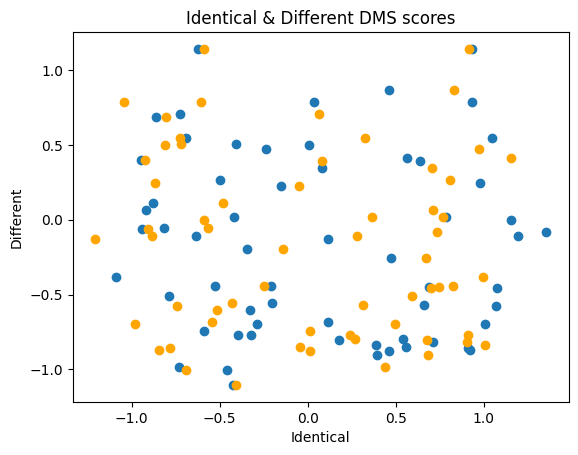

In [58]:
plt.scatter(data_identical[0:60], data_different)
plt.scatter(data_identical[126:186], data_different, color = 'orange')
plt.xlabel('Identical')
plt.ylabel('Different')
plt.title('Identical & Different DMS scores')
plt.show()

## Result: 

 1000 Runs: 
     - Average test statistics: 712.182
     - Average p-value: 0.20483589699610047



The p-value is not significant, therefore H0 hypothesis can not be rejected. Moreover the scatter plot distribution fluctuates with the 60 matches which are randomly choosen and does not show a correlation trend. Concludingly there is no significant difference in the distribution of the DMS values in the match or mismatch groups as we expected. 

